In [72]:
import math
import pylab
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
dx=0.5
dt=0.05
D=0.86                                      # D coefficient  
L=20                                        # x interval (0,20)
T=100                                       # t interval (0,100)
Nx=int(L/dx)+1                                         
Nt=int(T/dt)+1
print(dt/dx**2,1/2*D)

startBorder_0_x = lambda t,x: x*(60-x)/30   # Starting border u(t=0,x)
startBorder_t_0 = lambda t,x: 30            # Left border line u(t,x=0)
endBorder_t_L = lambda t,x: 0               # Right border line u(t,x=L)

pi=math.pi
e=math.e
ck=lambda k: 60/(k*pi)**3*(1-(k*pi)**2*(1+math.cos(k*pi)))
analytic=lambda t,x,D,L: (0-30)*x/L+30+sum([math.sin(k*pi*x/L)*ck(k)*e**(-((k*pi)**2)*D*t/L**2) for k in range(1,10)])


u=[]
w=[]

u.append([startBorder_0_x(0,x*dx) for x in range(Nx)]) #init starting border
w.append([startBorder_0_x(0,x*dx) for x in range(Nx)])
t=0
x=0
a=D*dt/(dx**2)

for n in range (Nt-1):
    u.append([])
    w.append([])
    t+=dt
    temp=startBorder_t_0(t+dt,0)
    u[n+1].append(temp)
    w[n+1].append(temp)
    for j in range(1,Nx-1):
        x+=dx
        u[n+1].append(u[n][j] + a*(u[n][j+1] - 2*u[n][j] + u[n][j-1]))
        w[n+1].append(analytic(t,x,D,L))
    x=0
    temp=endBorder_t_L(t+dt,1)
    u[n+1].append(temp)  
    w[n+1].append(temp)
    
ts=[t*dt for t in range(Nt)]
xs=[x*dx for x in range(Nx)]    

xs,ts = np.meshgrid(xs,ts)


0.2 0.43


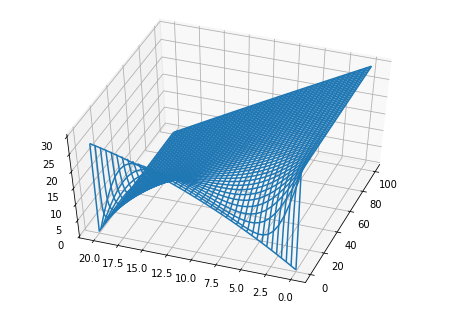

In [30]:
fig = pylab.figure()
ax = Axes3D(fig)
u=np.array(u)
w=np.array(w)
ax.plot_wireframe(ts, xs, u)
ax.view_init(50,200)
pylab.show()

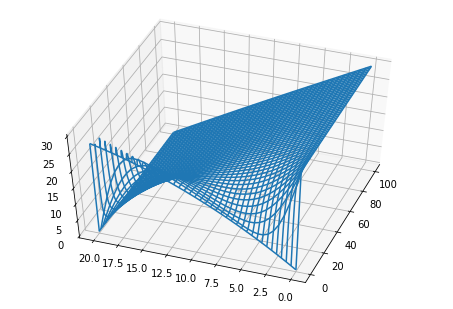

In [60]:
fig = pylab.figure()
ax = Axes3D(fig)
u=np.array(u)
w=np.array(w)
ax.plot_wireframe(ts, xs, w)
ax.view_init(50,200)
pylab.show()

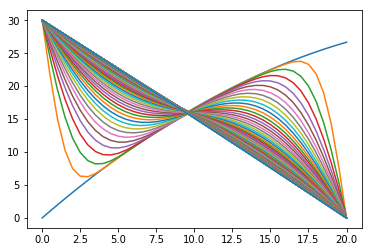

In [32]:
ts=[t*dt for t in range(Nt)]
xs=[x*dx for x in range(Nx)]
fig = pylab.figure()
for i in range(0,Nt,20):
    pylab.plot(xs,u[i])
pylab.show()

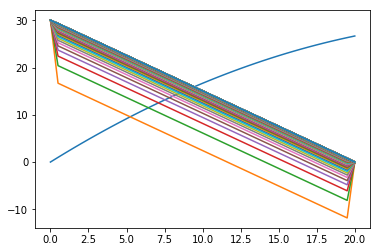

In [73]:
ts=[t*dt for t in range(Nt)]
xs=[x*dx for x in range(Nx)]
fig = pylab.figure()
for i in range(0,Nt,20):
    pylab.plot(xs,w[i])
pylab.show()

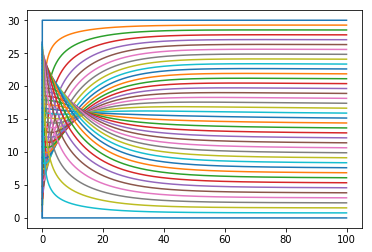

In [87]:
ts=[t*dt for t in range(Nt)]
xs=[x*dx for x in range(Nx)]
fig = pylab.figure()
for i in range(0,Nx):
    pylab.plot(ts,[u[j][i] for j in range(Nt)])
pylab.show()

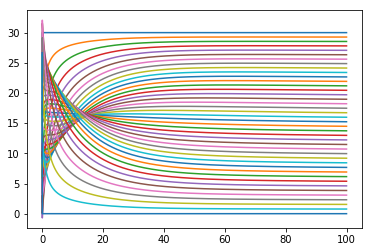

In [62]:
ts=[t*dt for t in range(Nt)]
xs=[x*dx for x in range(Nx)]
fig = pylab.figure()
for i in range(0,Nx):
    pylab.plot(ts,[w[j][i] for j in range(Nt)])
pylab.show()